# StegaStamp

> A good exploit is one that is delivered in style.  -- Saumil Shah

Improved the original repo, <i>Invisible Hyperlinks in Physical Photographs</i> @tancik, which without datasets and training parameters.

<br>

<p align="center">
  <img src="https://github.com/Charmve/StegaStamp-plus/raw/main/profile.png" alt="Folders in Ubuntu">
</p>

<br>

Made by [![Follow](https://img.shields.io/twitter/follow/psyth91?style=social)](https://www.zhihu.com/zvideo/1302252124579733504)  &nbsp;&nbsp;&nbsp;  <a href="https://github.com/Charmve"><img src="https://img.shields.io/badge/👓-Charmve-blue" alt="GitHub"></a>

To see how the model works, visit the project repository.

[![GitHub stars](https://img.shields.io/github/stars/Charmve/StegaStamp-plus?style=social)](https://github.com/Charmve/StegaStamp-plus)

## mount google drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/StegaStamp'
%ls

/content/drive/MyDrive/StegaStamp
checkpoints/      encode_image.py               README.md
datasets/         encode_img.sh                 requirements.txt
decode_image.py   LICENSE                       saved_models/
decode_img.sh     logs/                         scripts/
detector_cam.py   lpips/                        StegaStamp_train_model.ipynb
detector_cam.sh   models.py                     train.py
detector_models/  ngrok                         utils.py
detector.py       ngrok-stable-linux-amd64.zip  video_cam.py
detector.sh       out/
docs/             __pycache__/


## Installation

- <b>[Skip]</b> Clone repo and install submodules (<b>SPECIAL</b> for Chamrve)


In [ ]:
!git pull https://github.com/Charmve/StegaStamp-plus.git
%cd '/content/drive/MyDrive/StegaStamp'

- Install tensorflow (tested with tf 1.13)

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.4.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: h5py, tensorflow-estimator, flatbuffers, absl-py, opt-einsum, wrapt, protobuf, google-pasta, keras-preprocessing, numpy, six, astunparse, termcolor, typing-extensions, wheel, gast, tensorboard, grpcio
Required-by: fancyimpute


In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6MB 61kB/s 
     |████████████████████████████████| 3.2MB 37.8MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 368kB 33.4MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


- Download dependencies

In [ ]:
pip install -r requirements.txt

     |████████████████████████████████| 61kB 3.1MB/s 


- Python 3 required

In [ ]:
!python --version

Python 3.7.10


## Training


### Encoder / Decoder
- Set dataset path in train.py

`TRAIN_PATH = DIR_OF_DATASET_IMAGES`

- Train model

`bash scripts/base.sh EXP_NAME`

The training is performed in train.py. There are a number of hyperparameters, many corresponding to the augmentation parameters. scripts/bash.sh provides a good starting place.

Make sure that directory is ``/StegaStamp``

In [ ]:
%cd '/content/drive/MyDrive/StegaStamp'

/content/drive/MyDrive/StegaStamp


In [ ]:
!bash scripts/base.sh MyModel

Streaming output truncated to the last 5000 lines.
        [0.90588236, 0.9019608 , 0.8862745 ]]], dtype=float32), array([[[0.14901961, 0.08627451, 0.02745098],
        [0.14901961, 0.08627451, 0.02745098],
        [0.14901961, 0.08627451, 0.02745098],
        ...,
        [0.1254902 , 0.07450981, 0.04313726],
        [0.13725491, 0.10196079, 0.04313726],
        [0.12941177, 0.09803922, 0.02352941]],

       [[0.14901961, 0.08627451, 0.02352941],
        [0.14901961, 0.08627451, 0.02352941],
        [0.14901961, 0.08627451, 0.02352941],
        ...,
        [0.14509805, 0.10196079, 0.02352941],
        [0.14117648, 0.10980392, 0.01960784],
        [0.11764706, 0.09019608, 0.        ]],

       [[0.14117648, 0.09019608, 0.02352941],
        [0.14117648, 0.09019608, 0.02352941],
        [0.14901961, 0.08627451, 0.02352941],
        ...,
        [0.09803922, 0.05098039, 0.05098039],
        [0.12156863, 0.0627451 , 0.03529412],
        [0.14509805, 0.07450981, 0.01960784]],

       ...,


### Tensorboard
To visualize the training run the following command and then navigate to https://8c5d2393526a.ngrok.io in your browser.

#### Open ``tensorboard`` in Colab

**Method 1**



1.install ``ngrok`` （<b>had installed</b>, which can be seen at ``"drive/MyDrive/StegaStamp/ngrok"``）


In [ ]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


2.run TensorBoard on Colab


- add tensorboard's directory

In [ ]:
LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

- start ngrok service, and band port 6006(tensorboard)

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

- generate website, click the link to visit tensorboard

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


**Method 2**

In [ ]:
LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
# Install
! npm install -g localtunnel

# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

# Get url
! cat url.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.1
added 22 packages from 22 contributors in 4.218s


In [ ]:
! cat url.txt

your url is: https://brown-fly-97.loca.lt


## Encoding a Message
The script `encode_image.py` can be used to encode a message into an image or a directory of images. The default model expects a utf-8 encoded secret that is <= 7 characters (100 bit message -> 56 bits after ECC).

### Encode a message into an image:

In [ ]:
!python encode_image.py \
  saved_models/stegastamp_pretrained \
  --image datasets/test/test_img1.png  \
  --save_dir out \
  --secret Hello

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

### Show result

-- image datasets/test/test_img1.png  \
-- save_dir out \

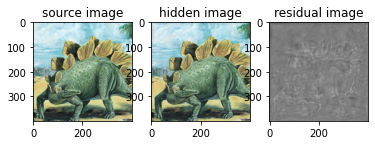

In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_result(filename, hidden_img, residual_img):
    # show these three img encoded
    # sess.run(tf.global_variables_initializer())
    
    fig = plt.figure()
    
    ax = fig.add_subplot(131)
    ax.set_title('source image')
    src_img = mpimg.imread(filename)
    ax.imshow(src_img)
    
    ax = fig.add_subplot(132)
    ax.set_title('hidden image')
    hid_img = mpimg.imread(hidden_img)
    ax.imshow(hid_img)
    
    ax = fig.add_subplot(133)
    ax.set_title('residual image')
    res_img = mpimg.imread(residual_img)
    ax.imshow(res_img)

if __name__ == "__main__":
  filename, hidden_img, residual_img = 'datasets/test/test_img1.png', './out/test_img1_hidden.png', './out/test_img1_residual.png'
  show_result(filename, hidden_img, residual_img)


<b>Note:</b> 

- if you use the modle you trained above, plese use ``saved_models/MyModel`` instead of ``saved_models/stegastamp_pretrained``

- This will save both the StegaStamp and the residual that was applied to the original image.

Or run the bash code directly:
```bash=
! bash encode_image.sh
```

## Decoding a Message
The script `decode_image.py` can be used to decode a message from a StegaStamp.

Example usage:


In [ ]:
!python decode_image.py \
  saved_models/stegastamp_pretrained \
  --image out/test_img1_hidden.png

Samely, or run the bash code directly:
```bash=
!bash decode_image.sh
```

And if you use the modle you trained above, plese use ``saved_models/MyModel`` instead of ``saved_models/stegastamp_pretrained``

## Detecting and Decoding
The script `detector.py` can be used to detect and decode StegaStamps in an image. This is useful in cases where there are multiple StegaStamps are present or the StegaStamp does not fill the frame of the image.

To use the detector, make sure to download the detector model as described in the installation section. The recomended input video resolution is 1920x1080.

In [ ]:
!python detector.py \
  --detector_model detector_models/stegastamp_detector \
  --decoder_model saved_models/stegastamp_pretrained \
  --video test_vid.mp4

<strong>Discription:</strong>
- Add the `--save_video FILENAME` flag to save out the results.

- The `--visualize_detector` flag can be used to visualize the output of the detector network. The mask corresponds to the segmentation mask, the colored polygons are fit to this segmentation mask using a set of heuristics. The detector outputs can noisy and are sensitive to size of the stegastamp. Further optimization of the detection network is not explored in this paper.

Samely, or run the bash code directly: ```bash= bash detector.sh``` in the terminal.




### Detecting and Decoding from Webcam
In browser 

```bash=
localhost:8080/detecdecode.html
```

## Update to GitHub

In [ ]:
%cd '/content/drive/MyDrive/StegaStamp'
!git pull
!git status

In [ ]:
!git add .
!git status

In [ ]:
!git commit -m "update saved_mode and .ipynb"
!git status

In [ ]:
!git push